<a href="https://colab.research.google.com/github/NeuralClassifier/OutlierDetect/blob/main/HierarchicalDensityOutlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install hdbscan

     |████████████████████████████████| 6.4 MB 7.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311926 sha256=6838f28028668141037bf771dd08edf39207275c7397cd154c540d14083b80d3
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [5]:
import numpy as np
import pandas as pd
from google.colab import files
import sys
import os
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import hdbscan
import statistics
import os
from sklearn.manifold import TSNE
#py_file_location = "/content/OutlierDetect/ODRA.ipynb"
#sys.path.append(os.path.abspath(py_file_location))

In [8]:
class LoadRealData:

  def __init__(self,datasetFileName):
    if datasetFileName == 'ionosphere.csv':
      self.df = pd.read_csv('/content/OutlierDetect/Data/ionosphere.csv')
      print(self.df.head())
    if datasetFileName == 'hepatitis.csv':
      self.df = pd.read_csv('/content/OutlierDetect/Data/hepatitis.csv')
      print(self.df.head())
    if datasetFileName == 'pima.csv':
      self.df = pd.read_csv('/content/OutlierDetect/Data/pima.csv')
      print(self.df.head())

  def encode(self,features):
    if features == 0:
      print('********************* Before ***********************')
      print()
      print(self.df.head())
      print()
      le = LabelEncoder()
      self.df.iloc[:,-1] = le.fit_transform(self.df.iloc[:,-1])
      print('********************* After ***********************')
      print()
      print(self.df.head())
      print()
      return self.df
    
    elif features == 1:
      st = input('All Columns? (Y/N): ')
      if st == 'Y':
        print('********************* Before ***********************')
        print()
        print(self.df.head())
        print()
        print('********************* After ***********************')
        le = LabelEncoder()
        for i in range(self.df.shape[1]):
          self.df.iloc[:,i] = le.fit_transform(self.df.iloc[:,i])
        
        print()
        print(self.df.head())
        print()
        return self.df

      elif st == 'N':
        listToencode = []

        print('********************* Enter the list of features to encode (enter # to end) ***********************')
        print()
        fts = 0
        while fts !='#':
          fts = input()
          listToencode.append(int(fts))

        print('********************* Before ***********************')
        print()
        print(self.df.head())
        print()
        print('********************* After ***********************')
        le = LabelEncoder()
        for i in listToencode:
          self.df.iloc[:,i] = le.fit_transform(self.df.iloc[:,i])
        
        print()
        print(self.df.head())
        print()
        return self.df




      else:
        print('Invalid input ... Try again!!') 
    
    else:
      print('Invalid input ... Try again!!') 

In [3]:
!git clone https://github.com/NeuralClassifier/OutlierDetect

Cloning into 'OutlierDetect'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 82 (delta 30), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (82/82), done.


In [4]:
!unzip /content/Overlap_MultiD.zip

Archive:  /content/Overlap_MultiD.zip
   creating: Overlap_MultiD/
   creating: Overlap_MultiD/.ipynb_checkpoints/
   creating: __MACOSX/
   creating: __MACOSX/Overlap_MultiD/
  inflating: __MACOSX/Overlap_MultiD/._.ipynb_checkpoints  
   creating: Overlap_MultiD/1/
  inflating: Overlap_MultiD/1/m1_dim10.xlsx  
   creating: __MACOSX/Overlap_MultiD/1/
  inflating: __MACOSX/Overlap_MultiD/1/._m1_dim10.xlsx  
  inflating: Overlap_MultiD/1/m1_dim100.xlsx  
  inflating: __MACOSX/Overlap_MultiD/1/._m1_dim100.xlsx  
  inflating: Overlap_MultiD/1/m1_dim11.xlsx  
  inflating: __MACOSX/Overlap_MultiD/1/._m1_dim11.xlsx  
  inflating: Overlap_MultiD/1/m1_dim12.xlsx  
  inflating: __MACOSX/Overlap_MultiD/1/._m1_dim12.xlsx  
  inflating: Overlap_MultiD/1/m1_dim13.xlsx  
  inflating: __MACOSX/Overlap_MultiD/1/._m1_dim13.xlsx  
  inflating: Overlap_MultiD/1/m1_dim14.xlsx  
  inflating: __MACOSX/Overlap_MultiD/1/._m1_dim14.xlsx  
  inflating: Overlap_MultiD/1/m1_dim15.xlsx  
  inflating: __MACOSX/Overl

In [ ]:
ld = LoadRealData('pima.csv')

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]


In [ ]:
df = ld.df
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#df = ld.encode(0)

In [ ]:
data = np.array(df.iloc[:,:-1])
y = np.array(df.iloc[:,-1])

In [ ]:
model = TSNE(n_components=2, random_state=0)
#tsne = model.fit_transform(X_ssTrain.reshape((len(X_ssTrain),800)))
tsne = model.fit_transform(data)
#y_tsne = np.zeros(len(data))

In [ ]:
tsne[:,0]

array([-27.735916  , -16.788     , -27.698519  ,   2.5261292 ,
        24.447634  ,  -7.416969  ,   0.34655988,  14.237572  ,
        40.828663  , -19.012606  , -12.773058  , -25.530956  ,
       -19.959755  ,  42.650482  ,  24.564974  ,  14.118191  ,
        33.581074  ,  -7.990311  ,   3.2782018 ,   7.732433  ,
        33.416702  , -12.466367  , -27.902422  , -25.577007  ,
        21.55776   ,  13.996598  , -18.43287   ,  13.2313595 ,
        16.575436  , -13.098343  , -27.320883  ,  32.895557  ,
        -9.070742  ,  -9.3679495 , -27.490917  ,  31.277735  ,
       -15.465951  , -24.219257  , -19.67729   ,  33.209316  ,
         2.5367744 , -14.584307  , -27.905998  ,  31.360737  ,
       -23.460716  , -30.85969   ,  -8.088595  , -15.966749  ,
       -21.249369  ,  16.214642  ,  -0.71951896, -10.232983  ,
       -18.21952   ,  35.613907  ,  37.887432  ,  -3.9738338 ,
        35.229847  ,   6.757367  , -18.837229  ,  15.572685  ,
        15.950202  , -15.549169  ,  -7.1100903 ,  17.54

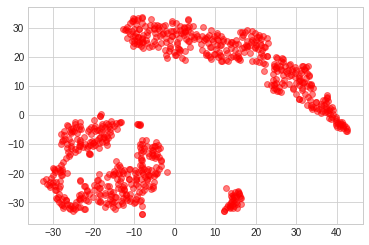

In [ ]:
plt.scatter(x=tsne[:,0],y=tsne[:,1], s=35, alpha=0.5,c='red')
#plt.savefig('/content/pima_tsne.pdf')

In [ ]:
class OutlierScoreRealLife:

  def __init__(self,data,datasetname,dim):
    self.dim = dim
    self.data = data
    self.datasetname = datasetname

  def findAvgOutlierScores(self,status):
    avgOutlierScore = []
    if self.dim <2:
      print('dim has to be greater than 2!')
    else:
      if status == 0:
        x = []
        for i in range(2,self.dim+1):
          x.append(i)
          hdb_scan = hdbscan.HDBSCAN(min_cluster_size=i)
          clusterer = hdb_scan.fit(self.data)
          avgOutlierScore.append(statistics.mean(clusterer.outlier_scores_ ))
        return x, avgOutlierScore
      elif status == 1:
        x = []
        for i in range(2,self.dim+1):
          x.append(i)
          hdb_scan = hdbscan.HDBSCAN(min_cluster_size=i)
          clusterer = hdb_scan.fit(self.data)
          sorted_scores = sorted(clusterer.outlier_scores_,reverse=True)
          avgOutlierScore.append(statistics.mean(sorted_scores[:int(len(data)/3)]))
        return x, avgOutlierScore
      elif status == 2:
        sts = int(input('Enter the Outlier limit: '))
        x = []
        for i in range(2,self.dim+1):
          x.append(i)
          hdb_scan = hdbscan.HDBSCAN(min_cluster_size=i)
          clusterer = hdb_scan.fit(self.data)
          sorted_scores = sorted(clusterer.outlier_scores_,reverse=True)
          avgOutlierScore.append(statistics.mean(sorted_scores[:sts]))
        return x, avgOutlierScore
      else:
        print('Invalid Status!')

  def outlierFigures(self):
    model = TSNE(n_components=2, random_state=0)
    for i in range(2,self.dim+1):
      #print(i)
      if i%20 == 0:
        #x.append(i)
        print('Displaying @ mpts '+str(i))
        hdb_scan = hdbscan.HDBSCAN(min_cluster_size=i)
        clusterer = hdb_scan.fit(data)
        threshold = pd.Series(clusterer.outlier_scores_).quantile(0.9)
        outliers = np.where(clusterer.outlier_scores_ > threshold)[0]
        tsne = model.fit_transform(self.data)
        plt.scatter(x=tsne[:,0],y=tsne[:,1], s=50, linewidth=0, c='gray', alpha=0.25)
        plt.scatter(x=tsne[outliers,0],y=tsne[outliers,1], s=50, linewidth=0, c='red', alpha=0.5)
        plt.grid(b=None)
        plt.axis('off')
        plt.savefig('/content/pimaOutlierTSNE/OutlierVisual_'+self.datasetname+'_mpts'+str(i)+'.pdf')
        plt.show()


In [ ]:
o_score = OutlierScore(data,300)
x, y = o_score.findAvgOutlierScores(0)

Displaying @ mpts 20


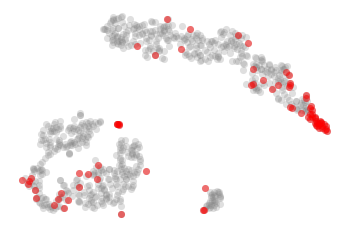

Displaying @ mpts 40


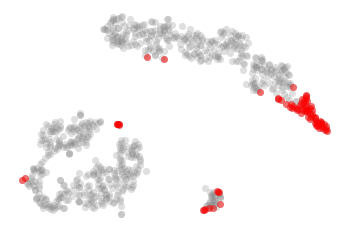

Displaying @ mpts 60


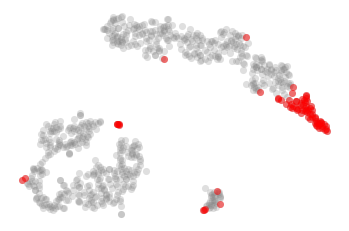

Displaying @ mpts 80


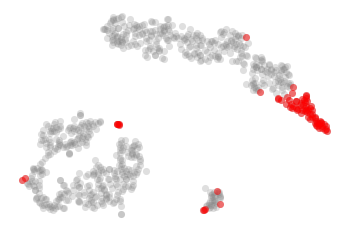

Displaying @ mpts 100


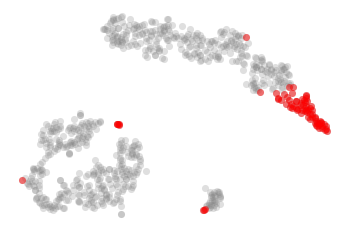

Displaying @ mpts 120


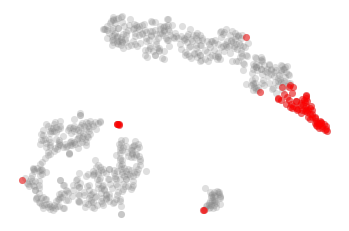

Displaying @ mpts 140


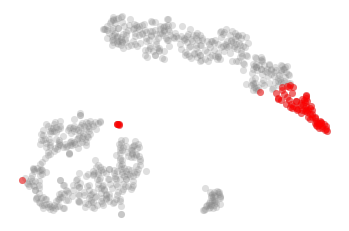

Displaying @ mpts 160


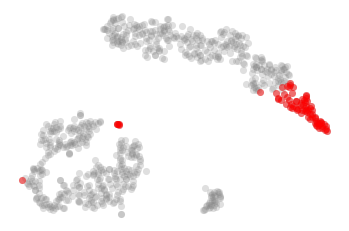

Displaying @ mpts 180


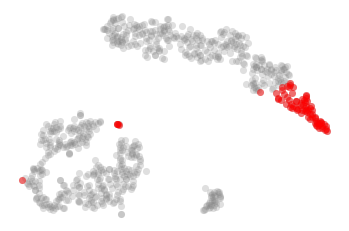

Displaying @ mpts 200


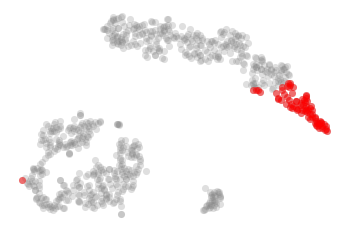

Displaying @ mpts 220


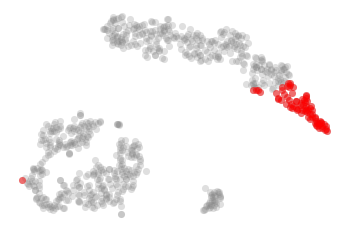

Displaying @ mpts 240


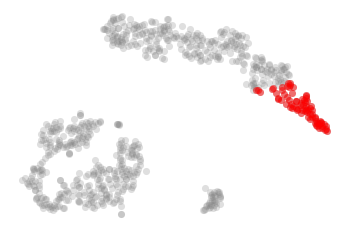

Displaying @ mpts 260


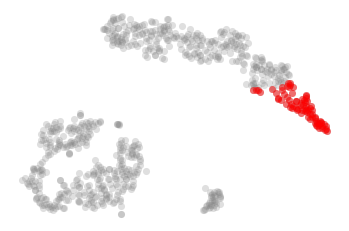

Displaying @ mpts 280


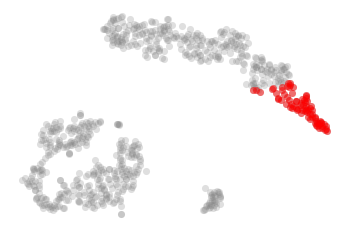

Displaying @ mpts 300


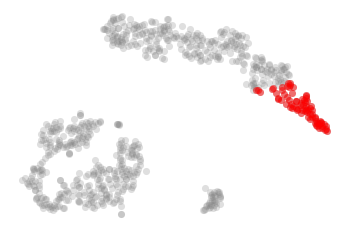

In [ ]:
o_score = OutlierScore(data,'pima',300)
o_score.outlierFigures()

In [ ]:
!zip -r /content/pimaOutlierTSNE.zip /content/pimaOutlierTSNE

  adding: content/pimaOutlierTSNE/ (stored 0%)
  adding: content/pimaOutlierTSNE/OutlierVisual_pima_mpts100.pdf (deflated 6%)
  adding: content/pimaOutlierTSNE/OutlierVisual_pima_mpts300.pdf (deflated 6%)
  adding: content/pimaOutlierTSNE/OutlierVisual_pima_mpts280.pdf (deflated 6%)
  adding: content/pimaOutlierTSNE/OutlierVisual_pima_mpts200.pdf (deflated 6%)
  adding: content/pimaOutlierTSNE/OutlierVisual_pima_mpts120.pdf (deflated 6%)
  adding: content/pimaOutlierTSNE/OutlierVisual_pima_mpts180.pdf (deflated 6%)
  adding: content/pimaOutlierTSNE/OutlierVisual_pima_mpts20.pdf (deflated 6%)
  adding: content/pimaOutlierTSNE/OutlierVisual_pima_mpts160.pdf (deflated 6%)
  adding: content/pimaOutlierTSNE/OutlierVisual_pima_mpts240.pdf (deflated 6%)
  adding: content/pimaOutlierTSNE/OutlierVisual_pima_mpts80.pdf (deflated 6%)
  adding: content/pimaOutlierTSNE/OutlierVisual_pima_mpts60.pdf (deflated 6%)
  adding: content/pimaOutlierTSNE/OutlierVisual_pima_mpts260.pdf (deflated 6%)
  adding

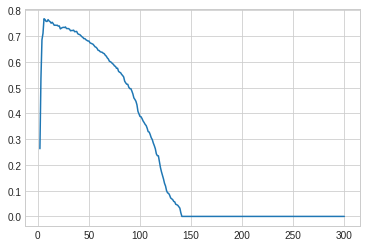

In [ ]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
ax.plot(x,y);
plt.savefig('/content/avgOutlierScore_hepatitis_T25.pdf')
plt.show()

In [ ]:
class OutlierScoreSyn:

  def __init__(self,data,dim):
    self.dim = dim
    self.data = data

  def findAvgOutlierScores(self,status):
    avgOutlierScore = []
    if self.dim <2:
      print('dim has to be greater than 2!')
    else:
      if status == 0:
        x = []
        for i in range(2,self.dim+1):
          x.append(i)
          hdb_scan = hdbscan.HDBSCAN(min_cluster_size=i)
          clusterer = hdb_scan.fit(self.data)
          avgOutlierScore.append(statistics.mean(clusterer.outlier_scores_ ))
        return x, avgOutlierScore
      elif status == 1:
        x = []
        for i in range(2,self.dim+1):
          x.append(i)
          hdb_scan = hdbscan.HDBSCAN(min_cluster_size=i)
          clusterer = hdb_scan.fit(self.data)
          sorted_scores = sorted(clusterer.outlier_scores_,reverse=True)
          avgOutlierScore.append(statistics.mean(sorted_scores[:int(len(self.data)/3)]))
        return x, avgOutlierScore
      elif status == 2:
        sts = int(input('Enter the Outlier limit: '))
        x = []
        for i in range(2,self.dim+1):
          x.append(i)
          hdb_scan = hdbscan.HDBSCAN(min_cluster_size=i)
          clusterer = hdb_scan.fit(self.data)
          sorted_scores = sorted(clusterer.outlier_scores_,reverse=True)
          avgOutlierScore.append(statistics.mean(sorted_scores[:sts]))
        return x, avgOutlierScore
      else:
        print('Invalid Status!')

In [ ]:
def computeForOverlap_overlapMultiD():
  i = 1
  #o_score = OutlierScore(data,300)
  while i <= 4:
    path = '/content/Overlap_MultiD/'+str(i)+'/'
    cnt = 1
    #while cnt <= 100:
    file_name = 'm'+str(i)+'_dim'+str(100)+'.xlsx'
    df = pd.read_excel(path+file_name)
    df.drop(['Unnamed: 0'],axis = 1)
    X = np.array(df.iloc[:,:-1])
    Y = df.iloc[:,-1]
      #cnt+=1
    o_score=OutlierScoreSyn(X,200)
    x, y = o_score.findAvgOutlierScores(1)
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x,y);
    plt.show()
    i+=1

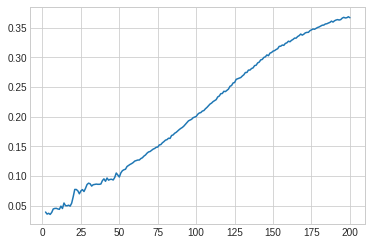

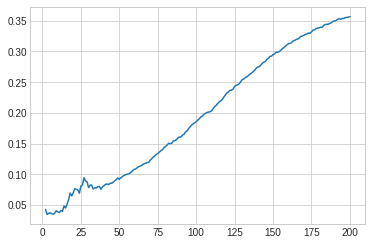

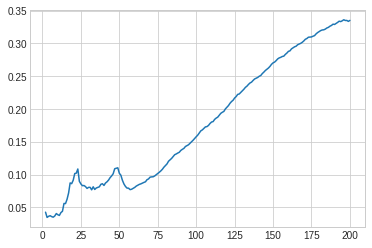

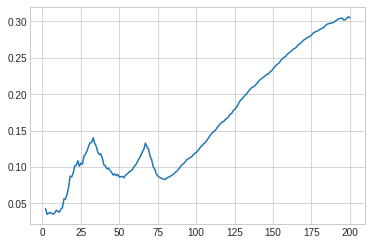

In [ ]:
computeForOverlap_overlapMultiD()

In [ ]:
pd.read_excel('/content/Overlap_MultiD/1/m1_dim100.xlsx')

,Unnamed: 0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,...,A62,A63,A64,A65,A66,A67,A68,A69,A70,A71,A72,A73,A74,A75,A76,A77,A78,A79,A80,A81,A82,A83,A84,A85,A86,A87,A88,A89,A90,A91,A92,A93,A94,A95,A96,A97,A98,A99,A100,Y
0,0,2.764052,1.400157,1.978738,3.240893,2.867558,0.022722,1.950088,0.848643,0.896781,1.410599,1.144044,2.454274,1.761038,1.121675,1.443863,1.333674,2.494079,0.794842,1.313068,0.145904,-1.552990,1.653619,1.864436,0.257835,3.269755,-0.454366,1.045759,0.812816,2.532779,2.469359,1.154947,1.378163,0.112214,-0.980796,0.652088,1.156349,2.230291,2.202380,0.612673,...,0.640447,0.186854,-0.726283,1.177426,0.598219,-0.630198,1.462782,0.092702,1.051945,1.729091,1.128983,2.139401,-0.234826,1.402342,0.315190,0.129203,0.421150,0.688447,1.056165,-0.165150,1.900826,1.465662,-0.536244,2.488252,2.895889,2.178780,0.820075,-0.070753,2.054452,0.596823,2.222445,1.208275,1.976639,1.356366,1.706573,1.010500,2.785870,1.126912,1.401989,0
1,1,2.883151,-0.347759,-0.270485,1.969397,-0.173123,2.943621,0.586381,0.252545,2.922942,2.480515,2.867559,1.906045,0.138774,2.910065,0.731997,1.802456,1.947252,0.844990,1.614079,1.922207,1.376426,-0.099401,1.298238,2.326386,0.305432,0.850365,0.564846,2.849264,1.672295,1.407462,0.230084,1.539249,0.325667,1.031831,0.364154,1.676433,1.576591,0.791701,1.396007,...,2.929532,1.949421,1.087551,-0.225436,1.844363,-0.000215,-0.544771,2.188030,1.316943,1.920859,1.318728,1.856831,0.348974,-0.034243,1.681595,0.196590,0.310450,0.544467,1.017479,0.646006,-0.374951,0.356382,-1.223403,1.625231,-0.602058,-0.104383,1.052165,0.260437,2.543015,-0.292857,1.267051,0.960717,-0.168093,1.523277,0.828454,1.771791,1.823504,3.163236,2.336528,0
2,2,0.630818,0.760621,2.099660,1.655264,1.640132,-0.616956,0.975674,0.261969,1.279925,0.901850,1.910179,1.317218,1.786328,0.533581,0.055554,0.589950,0.982980,1.379152,3.259309,0.957743,0.044055,0.654018,0.536404,1.481481,-0.540797,1.063262,1.156507,1.232181,0.402684,0.762078,-0.424061,0.506680,0.457139,1.416050,-0.156182,1.781198,2.494485,-1.069985,1.426259,...,0.493184,0.403686,0.947433,-0.936280,1.188779,1.523891,1.088422,0.689114,1.097400,1.399046,-1.772593,2.955912,1.390093,0.347591,0.609047,1.493742,0.883896,-1.030684,3.064493,0.889459,2.020173,0.307950,2.536377,1.286344,1.608844,-0.045253,2.211145,1.689818,2.301846,0.371912,0.518973,3.303917,-0.060016,0.864050,2.136891,1.097725,1.582954,0.600551,1.370056,0
3,3,-0.306527,2.658131,0.881836,0.319822,1.666383,0.539280,-0.334258,-0.346718,1.693773,0.840427,0.866298,2.077744,-0.126826,0.269322,0.615120,1.094352,0.957829,0.713113,0.938374,0.892695,0.280396,0.187007,1.274516,0.109085,-0.157355,0.687708,0.842333,3.256723,0.295300,1.943261,1.747188,-0.188945,1.773253,-0.183881,-1.659172,1.606320,-0.755891,1.450934,0.315989,...,1.003771,1.931848,1.339965,0.984318,1.160928,0.809347,0.605150,0.732266,-0.128011,1.280442,0.006876,1.841631,0.750541,1.049495,1.493837,1.643314,-0.570623,0.793096,1.880179,-0.698106,1.387280,-1.255564,-0.022507,1.038631,-0.656715,0.014489,-0.471835,2.648135,1.164228,1.567290,0.777325,0.646568,-0.616474,0.708163,0.238508,1.857924,2.141102,2.466579,1.852552,0
4,4,0.401346,-0.115897,1.766663,1.356293,-0.768538,1.355482,1.814520,1.058926,0.814946,0.192352,-0.446535,1.800298,0.690886,0.766533,2.732721,1.684501,1.370825,1.142062,2.519995,2.719589,1.929505,1.582225,-1.094603,1.123722,0.869893,1.093953,1.943046,-1.739677,0.430688,1.269904,0.533154,-0.416906,1.868963,1.276872,0.028895,1.314817,1.821586,1.005293,1.800565,...,0.021170,0.560810,1.181338,0.497183,3.412454,0.039496,0.206883,-1.288620,1.251484,-1.016407,0.460545,0.724329,0.290272,2.738873,1.994394,2.319137,0.117581,2.128594,1.496001,1.771406,2.029439,0.091237,0.575682,1.862596,-1.655619,2.513328,1.553132,0.954296,1.220508,-0.029935,0.650057,2.100284,2.298022,3.696224,0.926075,0.341447,0.485766,-0.018042,0.922145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [12]:
class OSFrequencyPerData:
  def __init__(self):
    self.dim = [2, 10, 20, 40, 80, 100]
    self.over = [1, 2, 3, 4]
  def generateMptsDatasetEachPoint(self, dim,over):
    path_to_folder = '/content/Overlap_MultiD/'+str(over)+'/'
    file_num = 'm'+str(over)+'_dim'+str(dim)+'.xlsx'
    path_to_file = path_to_folder+file_num
    df = pd.read_excel(path_to_file)
    df.drop(['Unnamed: 0'],axis=1,inplace = True)
    data_points_index = []
    outlier_score = []
    mpts = []
    data = np.array(df.iloc[:,:-1])
    for i in range(len(df)):
      m_pts = 2
      while m_pts<len(df):
        data_points_index.append(i)
        mpts.append(m_pts)
        hdb_scan = hdbscan.HDBSCAN(min_cluster_size=m_pts)
        clusterer = hdb_scan.fit(data)
        outlier_score.append(clusterer.outlier_scores_[i])
        m_pts+=1

    data_points_index=pd.DataFrame(data_points_index,columns=['data index'])
    mpts=pd.DataFrame(mpts,columns=['mpts'])
    outlier_score=pd.DataFrame(outlier_score,columns=['outlier score'])

    mpts_score=pd.concat([data_points_index,mpts,outlier_score],axis = 1)
    return mpts_score

  def outlierScore_perData_overlap_dim(self):
    path = "/content/outlierScore_perData"
    os.mkdir(path)
    for over in self.over:
      path_insideFolder = "/content/outlierScore_perData/"+str(over)
      os.mkdir(path_insideFolder)
      for dim in self.dim:
        mpts_score = self.generateMptsDatasetEachPoint(dim,over)
        mpts_score.to_excel(path_insideFolder+'/OS_EachPt_mpts_o'+str(over)+'d'+str(dim)+'.xlsx')


In [ ]:
osfpd = OSFrequencyPerData()
osfpd.outlierScore_perData_overlap_dim()

In [6]:
mpts_score = generateMptsDatasetEachPoint(2,3)

In [9]:
mpts_score.to_excel('/content/OS_EachPt_mpts.xlsx')

In [16]:
hdb_scan = hdbscan.HDBSCAN(min_cluster_size=100)
clusterer = hdb_scan.fit(data)
len(clusterer.outlier_scores_)
#sorted_scores = sorted(clusterer.outlier_scores_,reverse=True)

400